**SPOTIFY DATA ANALYSIS** 

*(from Dec 2021 to Dec 2022)*

*RFMUSK account*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read Data from Excel file
tracks_data = pd.read_excel('CleanDataExcel.xlsx')

In [3]:
tracks_data.head(5)

,endTime,artistName,trackName,msPlayed
0,12/17/2021 0:00,Keane,Everybody's Changing,215880
1,12/17/2021 0:05,The Wallflowers,One Headlight,2683
2,12/17/2021 0:05,The Wallflowers,One Headlight,311774
3,12/17/2021 0:05,Def Leppard,Love Bites - Remastered 2017,11022
4,12/17/2021 0:08,Linkin Park,Somewhere I Belong,213933


In [35]:
tracks_data.shape

(14819, 9)

In [5]:
# Now check for the null values sum on each columns
pd.isnull(tracks_data).sum()

endTime       0
artistName    0
trackName     0
msPlayed      0
dtype: int64

In [36]:
tracks_data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14819 entries, 0 to 14818
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   endTime     14819 non-null  datetime64[ns]
 1   artistName  14819 non-null  object        
 2   name        14819 non-null  object        
 3   msPlayed    14819 non-null  int64         
 4   Year        14819 non-null  int64         
 5   Month       14819 non-null  int64         
 6   day         14819 non-null  int64         
 7   hour        14819 non-null  int64         
 8   day1        14819 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 1.0+ MB


In [37]:
#for the analysis I need to work with DateTime, so I need to convert endTime Column to DateTime Type
tracks_data["endTime"] = pd.to_datetime(tracks_data["endTime"])
tracks_data["endTime"] 

0       2021-12-17 00:00:00
1       2021-12-17 00:05:00
2       2021-12-17 00:05:00
3       2021-12-17 00:05:00
4       2021-12-17 00:08:00
                ...        
14814   2022-12-17 20:13:00
14815   2022-12-17 20:21:00
14816   2022-12-17 20:24:00
14817   2022-12-17 20:26:00
14818   2022-12-17 22:35:00
Name: endTime, Length: 14819, dtype: datetime64[ns]

In [147]:
#Now i will create several columns out of EndTime Column
tracks_data ["minPlayed"] = (tracks_data ["msPlayed"]/1000/60).round(2)
tracks_data ["Year"] = tracks_data ["endTime"].dt.year
tracks_data ["Month"] = tracks_data ["endTime"].dt.month
tracks_data ["day"] = tracks_data ["endTime"].dt.day
tracks_data ["hour"] = tracks_data ["endTime"].dt.hour
tracks_data ["day1"] = tracks_data ["endTime"].dt.day_name()
tracks_data.head(10)

,endTime,artistName,name,msPlayed,Year,Month,day,hour,day1,Minutes Played,minPlayed
0,2021-12-17 00:00:00,Keane,Everybody's Changing,215880,2021,12,17,0,Friday,3.598000,3.60
1,2021-12-17 00:05:00,The Wallflowers,One Headlight,2683,2021,12,17,0,Friday,0.044717,0.04
2,2021-12-17 00:05:00,The Wallflowers,One Headlight,311774,2021,12,17,0,Friday,5.196233,5.20
3,2021-12-17 00:05:00,Def Leppard,Love Bites - Remastered 2017,11022,2021,12,17,0,Friday,0.183700,0.18
4,2021-12-17 00:08:00,Linkin Park,Somewhere I Belong,213933,2021,12,17,0,Friday,3.565550,3.57
5,2021-12-17 00:13:00,The Cranberries,Zombie,306440,2021,12,17,0,Friday,5.107333,5.11
6,2021-12-17 00:18:00,The Smashing Pumpkins,"Tonight, Tonight - Remastered 2012",254626,2021,12,17,0,Friday,4.243767,4.24
7,2021-12-17 00:22:00,Sheryl Crow,All I Wanna Do,272866,2021,12,17,0,Friday,4.547767,4.55
8,2021-12-17 00:23:00,The Smashing Pumpkins,Bullet With Butterfly Wings - Remastered 2012,77840,2021,12,17,0,Friday,1.297333,1.30
9,2021-12-17 05:17:00,George Harrison,Ballad Of Sir Frankie Crisp (Let It Roll) - Re...,27954,2021,12,17,5,Friday,0.465900,0.47


In [76]:
#Top 20 Artist measured by Total of miliSeconds PLayed
df_artist = tracks_data.groupby('artistName')['minPlayed'].sum().sort_values(ascending=False)
print (df_artist.head(20))

artistName
Metallica                   3048.46
Heroes Del Silencio          919.50
Miles Davis                  855.85
Pantera                      743.83
Slayer                       742.82
TOOL                         704.09
David Gilmour                694.56
The Joe Rogan Experience     674.37
Guns N' Roses                523.18
Iron Maiden                  520.67
Red Hot Chili Peppers        442.70
Oasis                        419.54
Rage Against The Machine     419.24
Charlie Parker               389.33
Albert King                  375.88
Pink Floyd                   365.75
Pearl Jam                    342.65
Jimi Hendrix                 340.41
The Police                   324.03
The Beatles                  301.81
Name: minPlayed, dtype: float64


In [78]:
#Top 10 Artist and songs measured by Total of Minutes PLayed
df_song = tracks_data.groupby('name')['minPlayed'].sum().sort_values(ascending=False)
print (df_song.head(10))

name
High Hopes - Live In Gdansk    233.11
Pneuma                         137.50
Even Flow                      134.85
Hysteria                       127.45
#877 - Jordan Peterson         122.84
Invincible                     121.60
Sultans Of Swing               116.58
Like a Stone                   110.64
Confusion                      109.27
La espuma de Venus             105.94
Name: minPlayed, dtype: float64


In [148]:
#How many songs I have played by day *total
df_day = tracks_data.groupby('day1')['name'].count().sort_values(ascending=False)
print(df_day)

day1
Saturday     3909
Sunday       2888
Friday       2042
Thursday     1594
Tuesday      1561
Monday       1452
Wednesday    1373
Name: name, dtype: int64


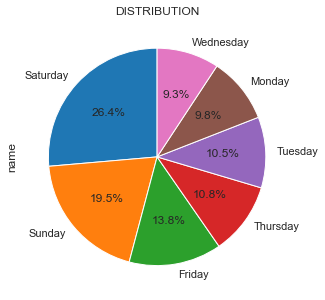

In [140]:
# create a pie chart 
df_day.plot.pie(y='PIE', labels=df_day.index, legend=False, figsize=(7,5), colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
                    '#9467bd', '#8c564b', '#e377c2'], 
                autopct='%1.1f%%', shadow=False, startangle =90)

# add a title to the pie chart
plt.title('DISTRIBUTION')

# show the plot
plt.show()

In [149]:
#How many Minutes of Music I have played by day *total
df_day1 = tracks_data.groupby('day1')['minPlayed'].sum().sort_values(ascending=False)
print(df_day1)

day1
Saturday     11281.76
Sunday        8467.96
Friday        6217.03
Tuesday       5134.93
Thursday      4907.77
Monday        4460.30
Wednesday     4128.60
Name: minPlayed, dtype: float64


In [145]:
#How many Different TRACKS I have played using Spotify?
tracks_data["name"].nunique()

6059

In [146]:
#How many Different Artist I have played using Spotify?
tracks_data["artistName"].nunique()

1952

In [152]:
#top days *by Minutes
df_day = tracks_data.groupby(['Year','Month', 'day'])['minPlayed'].sum().sort_values(ascending=False)
print (df_day.head(3))

Year  Month  day
2022  7      4      752.21
2021  12     25     722.30
2022  7      3      625.77
Name: minPlayed, dtype: float64


In [158]:
#top days by Amount of songs
df_day1 = tracks_data.groupby(['Year','Month', 'day'])['name'].count().sort_values(ascending=False)
print (df_day1.head(3))

Year  Month  day
2022  7      4      286
2021  12     25     243
2022  6      11     219
Name: name, dtype: int64


In [159]:
tracks_data["minPlayed"].sum()

44598.34999999999

In [1]:
##END...